In [21]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import random
from imageio import imread


In [22]:
data = imread("./me.jpg")

# get original image width & height
w, h = data.shape[0], data.shape[1]
# reshape s.t. each pixel is a data sample and each channel is a feature
X = data.copy()
X = np.ravel(X).reshape(w*h, 3)

# K is the number of clusters
K = 3

# m is number of samples, n is number of features
m,n = X.shape

# cluster centroid for each data sample (each pixel)
c = np.zeros((m), dtype = int)

def initRandomCentroid(X, K):
    m, n = X.shape
    indices = random.sample(range(m), K)
    centroids = np.zeros((K, n), dtype = float)
    for i in range(K):
        centroids[i] = X[indices[i]]
    
    return centroids
    
def findNearestCentroid(X, K, centroids):
    global c
    m = X.shape[0]
    for i in range(m):
        bestdistance = None
        for j in range(K):
            newdistance = np.sum(np.square(X[i,:] - centroids[j,:]))
            if j==0:
                bestdistance = newdistance
                c[i] = j
            else:
                if newdistance < bestdistance:
                    bestdistance = newdistance
                    c[i] = j
                    
                    
def UpdateCentroid(centroids, X, c):
    m,n = X.shape    
    for i in range(K):
        sumNearPts = np.zeros((n, ), dtype = float)
        numNearPts = 0
        for j in range(m):
            if(c[j] == i):
                numNearPts += 1
                sumNearPts[:] += X[j,:]
        
        newcentroid = sumNearPts / numNearPts
        centroids[i] = newcentroid                   
                    

def iterate(num_iterations = 5):
    for i in range(num_iterations):    
        findNearestCentroid(X, K, centroids)
        UpdateCentroid(centroids, X, c)


def updateImage():
    for i in range(m):
        X[i] = centroids[c[i]]


In [23]:
num_iterations = 5      
    
centroids = initRandomCentroid(X, K)
iterate(num_iterations)
updateImage()


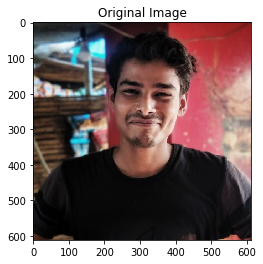

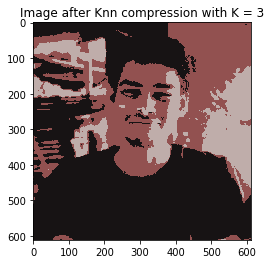

In [26]:
X = X.reshape(w, h, 3)

plt.imshow(data)
plt.title('Original Image')
plt.show()

plt.imshow(X)
plt.title('Image after Knn compression with K = {}'.format(K))
plt.show()        